In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

## Mosaic Geometry

Georeferenced EO data sets are often too huge to be stored as one single file and are therefore often tiled and provided in a gridded structure. Geometry-wise, such a structure was realised within the `MosaicGeometry` classes, which represent a well-defined collection of `Tile` objects, which are a light wrapper around a `RasterGeometry`. The basic `MosaicGeometry` sets the following requirements to its tiles:

- a tile is represented by a `RasterGeometry` object, so only rectangular shapes are allowed 
- all tiles must have the same CRS
- tiles are not allowed to intersect with each other

The neighbourhood relationship is stored in an adjacency matrix (https://en.wikipedia.org/wiki/Adjacency_matrix), which allows performant spatial queries beyond tile boundaries.

### Tile

A `Tile` object is a slim wrapper around a `RasterGeometry` object. It stores some further attributes, which are relevant for interacting with a mosaic:

- `active`: Flag indicating if a tile is "visible"/active or not. 
- `mosaic_topology`: A string defining the relation with the mosaic boundary. It can be "INNER", "OUTER", or "BOUNDARY". If it is None, then this indicates that the tile is decoupled from the original mosaic, e.g. after an intersection with a geometry.
- `metadata`: A dictionary storing some additional metadata information.
- `mask`: This parameter is a place-holder for a pixel mask indicating valid and non-valid pixel coordinates. This parameter is internally used when accessing tiles through the mosaic containing labelled pixels depending on the relation with the mosaic boundary.

### Initialisation

The constructor of `MosaicGeometry` expects the following arguments:

- `tiles`: List of `Tile` (or other child classes) instances.
- `boundary`: A polygon strictly defining the valid area of the mosaic, i.e. in which coordinates are allowed to exist. In the default case, the cascaded union of all tiles defines the boundary of the mosaic.
- `adjacency_matrix`: A quadratic adjacency matrix defining the direct neighbourhood relationship. It should only contain booleans or ones/zeros.
- `name` (optional): Name of the mosaic
- `description` (optional): Verbal description of the raster geometry.
- `check_consistency` (optional): If true, the requirements listed above are checked.

In [2]:
from geospade.crs import SpatialRef
from geospade.raster import Tile
from geospade.raster import MosaicGeometry

# define spatial reference system
sref = SpatialRef(4326)
# define the tiles of the mosaic
n_rows = 50
n_cols = 50
geotrans = (5, 0.2, 0, 50, 0, -0.2)
tile_1 = Tile(n_rows, n_cols, sref, geotrans=geotrans, name="Tile 1", metadata={'test': True})
n_rows = 50
n_cols = 50
geotrans = (15, 0.2, 0, 50, 0, -0.2)
tile_2 = Tile(n_rows, n_cols, sref, geotrans=geotrans, name="Tile 2", active=False, metadata={'test': True})
n_rows = 50
n_cols = 50
geotrans = (25, 0.2, 0, 50, 0, -0.2)
tile_3 = Tile(n_rows, n_cols, sref, geotrans=geotrans, name="Tile 3", metadata={'test': False})
n_rows = 50
n_cols = 75
geotrans = (5, 0.2, 0, 40, 0, -0.2)
tile_4 = Tile(n_rows, n_cols, sref, geotrans=geotrans, name="Tile 4", metadata={'test': False})
n_rows = 50
n_cols = 75
geotrans = (20, 0.2, 0, 40, 0, -0.2)
tile_5 = Tile(n_rows, n_cols, sref, geotrans=geotrans, name="Tile 5", metadata={'test': False})

tiles = [tile_1, tile_2, tile_3, tile_4, tile_5] 

# define other attributes of the mosaic
mosaic_name = "Mosaic 1"
mosaic_geom = MosaicGeometry(tiles, name=mosaic_name)

This is not the only way to create a mosaic geometry. Similar as for a raster geometry, you can create a mosaic geometry from a JSON-like definition, which contains the adjacency matrix and the mosaic properties in addition to the list of tiles:

In [3]:
import json
json_str = """ 
{
    "name": "Mosaic 1",
    "description": "",
    "boundary": "POLYGON ((5 30,5 40,5 50,15 50,25 50,35 50,35 40,35 30,20 30,5 30))",
    "tiles": {
        "0": {
            "name": "Tile 1",
            "active": "true",
            "mosaic_topology": "INNER",
            "metadata": {},
            "number_of_rows": 50,
            "number_of_columns": 50,
            "spatial_reference": {
                "proj": "longlat",
                "datum": "WGS84",
                "no_defs": true
            },
            "geotransformation": [
                5,
                0.2,
                0,
                50,
                0,
                -0.2
            ],
            "pixel_origin": "ul",
            "description": ""
        },
        "1": {
            "name": "Tile 2",
            "active": "false",
            "mosaic_topology": "INNER",
            "metadata": {},
            "number_of_rows": 50,
            "number_of_columns": 50,
            "spatial_reference": {
                "proj": "longlat",
                "datum": "WGS84",
                "no_defs": true
            },
            "geotransformation": [
                15,
                0.2,
                0,
                50,
                0,
                -0.2
            ],
            "pixel_origin": "ul",
            "description": ""
        },
        "2": {
            "name": "Tile 3",
            "active": "true",
            "mosaic_topology": "INNER",
            "metadata": {},
            "number_of_rows": 50,
            "number_of_columns": 50,
            "spatial_reference": {
                "proj": "longlat",
                "datum": "WGS84",
                "no_defs": true
            },
            "geotransformation": [
                25,
                0.2,
                0,
                50,
                0,
                -0.2
            ],
            "pixel_origin": "ul",
            "description": ""
        },
        "3": {
            "name": "Tile 4",
            "active": "true",
            "mosaic_topology": "INNER",
            "metadata": {},
            "number_of_rows": 50,
            "number_of_columns": 75,
            "spatial_reference": {
                "proj": "longlat",
                "datum": "WGS84",
                "no_defs": true
            },
            "geotransformation": [
                5,
                0.2,
                0,
                40,
                0,
                -0.2
            ],
            "pixel_origin": "ul",
            "description": ""
        },
        "4": {
            "name": "Tile 5",
            "active": "true",
            "mosaic_topology": "INNER",
            "metadata": {},
            "number_of_rows": 50,
            "number_of_columns": 75,
            "spatial_reference": {
                "proj": "longlat",
                "datum": "WGS84",
                "no_defs": true
            },
            "geotransformation": [
                20,
                0.2,
                0,
                40,
                0,
                -0.2
            ],
            "pixel_origin": "ul",
            "description": ""
        }
    },
    "type": "irregular",
    "adjacency_matrix": [
        [
            false,
            true,
            false,
            true,
            false
        ],
        [
            true,
            false,
            true,
            true,
            true
        ],
        [
            false,
            true,
            false,
            false,
            true
        ],
        [
            true,
            true,
            false,
            false,
            true
        ],
        [
            false,
            true,
            true,
            true,
            false
        ]
    ]
}
"""
definition = json.loads(json_str)
mosaic_geom_def = MosaicGeometry.from_definition(definition)

### Properties

A mosaic geometry shares some common attributes with a raster geometry:

In [4]:
mosaic_geom.sref

In [5]:
mosaic_geom.ori

-0.0

In addition, you can access the tiles via

In [6]:
mosaic_geom.tiles

, and the tile names via

In [7]:
mosaic_geom.tile_names

['Tile 1', 'Tile 3', 'Tile 4', 'Tile 5']

Both properties allow access to the tiles set to `active=True`. If you want to retrieve all tiles disregarding their visibility status, use:

In [8]:
mosaic_geom.all_tiles

In [9]:
mosaic_geom.all_tile_names

['Tile 1', 'Tile 2', 'Tile 3', 'Tile 4', 'Tile 5']

### Plotting

A mosaic geometry offers a simple wrapper to plot each tile, with almost the same keywords as for the `plot()` function of a raster geometry. In addition, you can choose if you want to only show active tiles (`active_only=True`, default) and to plot the mosaic boundary (`plot_boundary=True`, default).

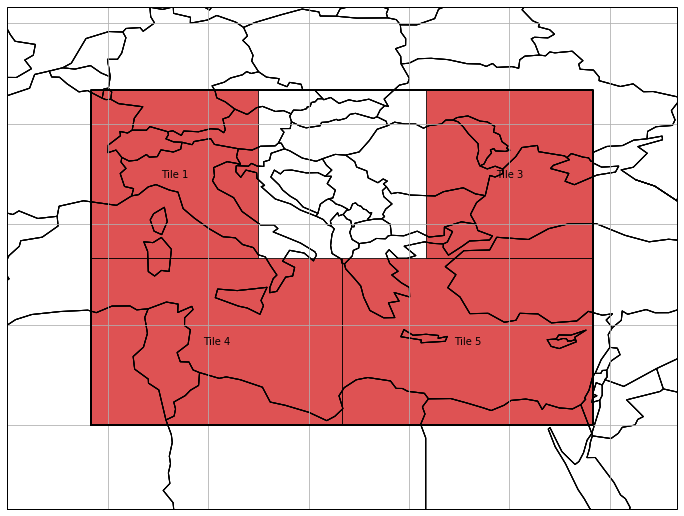

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
mosaic_geom.plot(label_tiles=True, alpha=0.8, extent=[0, 25, 40, 55], plot_boundary=True, active_only=True)

### Tile Access

There are several options to access a tile within a mosaic geometry. First you can use brackets with a tile name to get a tile object from a mosaic.

In [11]:
tile_by_brkts = mosaic_geom['Tile 1']

If you want to know which tile is covering a coordinate tuple, you can use

In [12]:
tile_by_coords = mosaic_geom.xy2tile(5.25, 49.6)

Both tiles should be the same:

In [13]:
tile_by_brkts == tile_by_coords

True

There is also the possibility to get the direct neighbours of one tile:

In [14]:
mosaic_geom.get_neighbouring_tiles('Tile 1')

{'Tile 4': <geospade.raster.Tile at 0x12bb20b9048>}

As you can see above, all tile access methods (except the `[]` access with a tile name) return a dictionary with the tile names as keys and the tile objects as values.

You can also select tiles by specifying a geometry, which can be intersected with the mosaic as follows:

In [15]:
from osgeo import osr
from osgeo import ogr
from shapely.geometry import Polygon

polygon = Polygon([(10, 47), (17, 41), (15, 35), (7, 33), (10, 47)])
ogr_geom = ogr.CreateGeometryFromWkt(polygon.wkt)
ogr_geom.AssignSpatialReference(sref.osr_sref)

sel_tiles = mosaic_geom.select_tiles_by_geom(ogr_geom, active_only=True, apply_mask=True)
sel_tiles

{'Tile 1': <geospade.raster.Tile at 0x12bab7f4d68>,
 'Tile 4': <geospade.raster.Tile at 0x12bb20b9048>}

Besides specifying if only active tiles should be considered (`active_only=True`, default), you can set `apply_mask`, which generates valid pixel mask for each tile (`apply_mask=True`, default).

In [16]:
sel_tiles['Tile 1'].mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

A very similar function goes one step further, and intersects the tiles with a given geometry, thus decoupling them from the mosaic. 

In [17]:
intsct_tiles = mosaic_geom.slice_tiles_by_geom(ogr_geom, active_only=True)
intsct_tiles

{0: <geospade.raster.Tile at 0x12bb307b5f8>,
 1: <geospade.raster.Tile at 0x12bb307b668>}

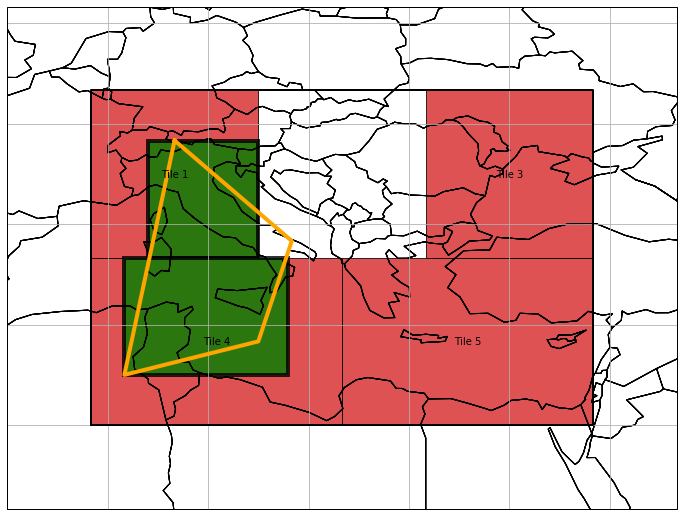

In [18]:
x_coords, y_coords = polygon.exterior.xy
plt.figure(figsize=(12, 12))
ax = mosaic_geom.plot(label_tiles=True, alpha=0.8, extent=[0, 25, 40, 55], plot_boundary=True, active_only=True)
ax = intsct_tiles[0].plot(ax, edgewidth=4, alpha=0.8, facecolor='green')
ax = intsct_tiles[1].plot(ax, edgewidth=4, alpha=0.8, facecolor='green')
ax.plot(x_coords, y_coords, color='orange', linewidth=4)

### Subsetting

Instead of retrieving single tiles from a spatial query, you can also change the active tiles in a mosaic. This can be done very similar as before, i.e. by intersecting the original mosaic geometry with another geometry.

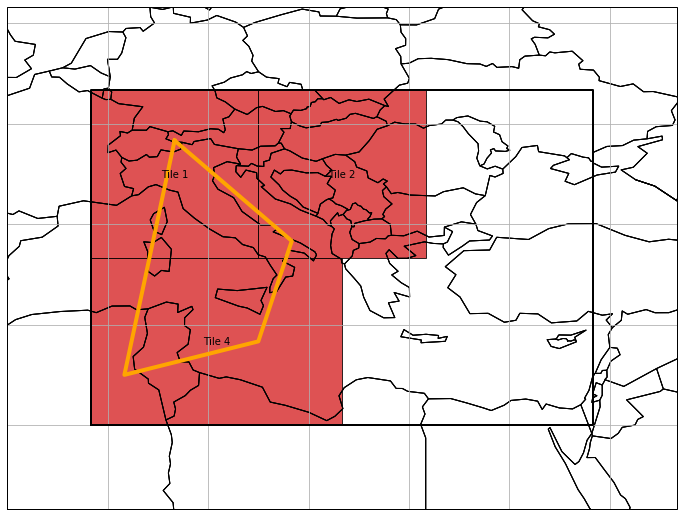

In [19]:
mosaic_geom.slice_by_geom(ogr_geom)

plt.figure(figsize=(12, 12))
ax = mosaic_geom.plot(label_tiles=True, edgewidth=1, alpha=0.8, extent=[0, 25, 40, 55])
ax.plot(x_coords, y_coords, color='orange', linewidth=4)

Another option is to filter the tiles by metadata entries, e.g. we want to only work with tiles, where the metadata attribute `'test'` equals to `True`.

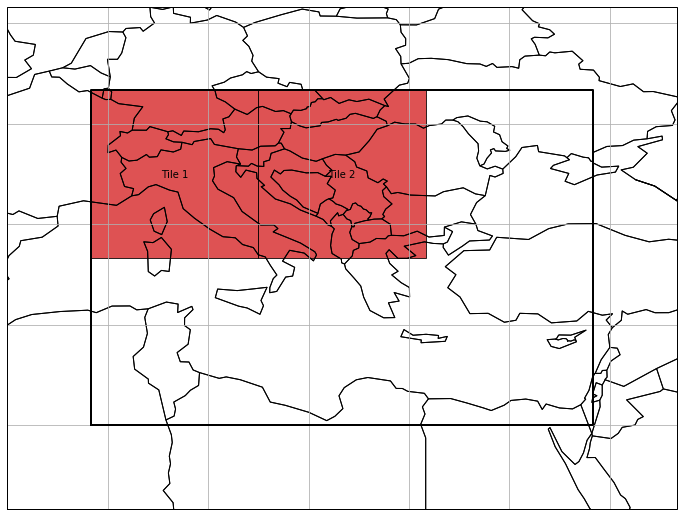

In [20]:
mosaic_geom.filter_tile_metadata({'test': True})

plt.figure(figsize=(12, 12))
mosaic_geom.plot(label_tiles=True, edgewidth=1, alpha=0.8, extent=[0, 25, 40, 55])

## Regular Mosaic Geometry

With respect to `MosaicGeometry`, `RegularMosaicGeometry` sets some further requirements to its tiles:

- same pixel size
- same shape

This structure paves the path for more performant spatial queries and solving neighbourhood relationships. Such relationships are also encoded in an adjacency matrix, but this time not in a binary format. The dimensions of the matrix refer to the dimensions of the mosaic (e.g. number of tiles in S and W direction) and its entries to a tile name.

An additional classmethod `from_rectangular_definition` can help to create a regular mosaic geometry. In the following example we also make use of the `boundary` parameter (same for `MosaicGeometry`) to exemplify its interaction with the tiles. 

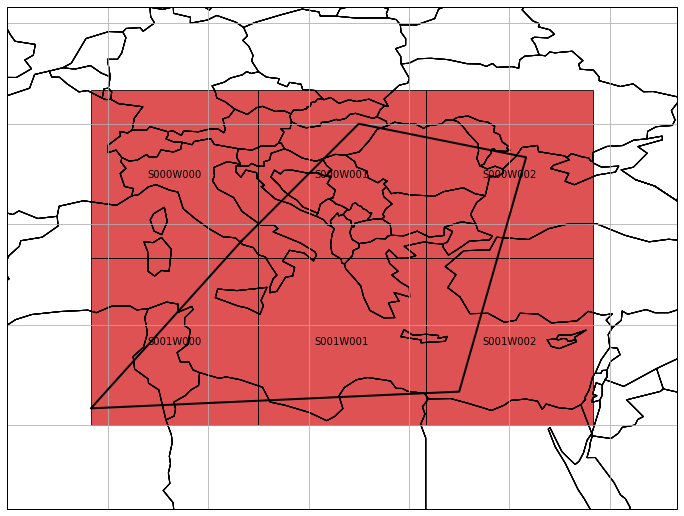

In [21]:
from geospade.raster import RegularMosaicGeometry

mosaic_ul_x = 5
mosaic_ul_y = 50
mosaic_rows = 2
mosaic_cols = 3
x_tile_size = 10.
y_tile_size = 10.
geotrans = (mosaic_ul_x, 0.2, 0., mosaic_ul_y, 0., -0.2)
mosaic_boundary = Polygon(((14, 41), (21, 48), (31, 46), (27, 32), (5, 31), (14, 41)))
mosaic_boundary = ogr.CreateGeometryFromWkt(mosaic_boundary.wkt)
mosaic_boundary.AssignSpatialReference(sref.osr_sref)

reg_mosaic_geom = RegularMosaicGeometry.from_rectangular_definition(mosaic_rows, mosaic_cols, x_tile_size,
                                                                    y_tile_size, sref, 
                                                                    boundary=mosaic_boundary,
                                                                    geotrans=geotrans)

plt.figure(figsize=(12, 12))
reg_mosaic_geom.plot(label_tiles=True, edgewidth=1, alpha=0.8, extent=[0, 25, 40, 55])

A regular mosaic geometry has the same properties as a basic mosaic geometry, except an additional shape property.

In [22]:
reg_mosaic_geom.shape

(2, 3)

None of the tiles is now fully inside or outside the mosaic, i.e. they all share the relation "BOUNDARY".

In [23]:
reg_mosaic_geom['S001W001'].mosaic_topology

'BOUNDARY'

This means, if we access a tile by specifying coordinates being outside the mosaic boundary, we get `None` as a return value:

In [24]:
reg_mosaic_geom.xy2tile(6, 50)

whereas for coordinates being inside we get

In [25]:
reg_mosaic_geom.xy2tile(14, 41).name

'S000W000'

Moreover, the masks of the "BOUNDARY" tiles now directly represent the mosaic boundary at the specified mosaic pixel sampling: 

In [26]:
reg_mosaic_geom['S001W001'].mask

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

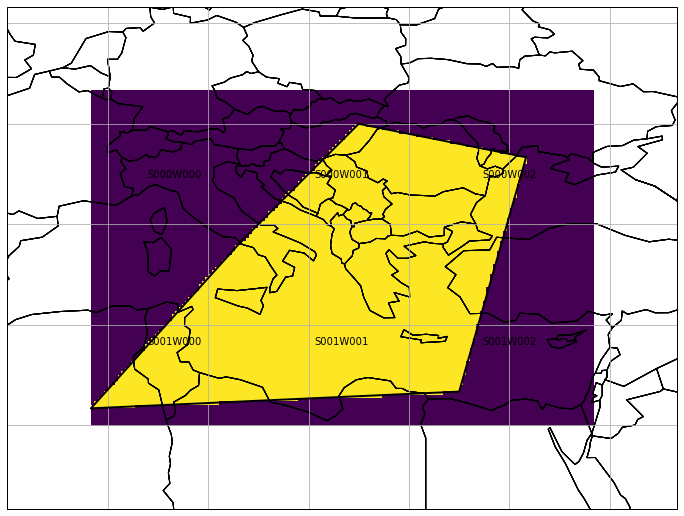

In [27]:
plt.figure(figsize=(12, 12))
ax = reg_mosaic_geom.plot(label_tiles=True, edgewidth=1, alpha=0.8, extent=[0, 25, 40, 55])
for tile_name in reg_mosaic_geom.tile_names:
    tile = reg_mosaic_geom[tile_name]
    outer_boundary_extent = tile.outer_boundary_extent
    extent = (outer_boundary_extent[0], outer_boundary_extent[2], outer_boundary_extent[3], outer_boundary_extent[1])
    ax.imshow(tile.mask, extent=extent)